Name : Omkar Awari
Div:AI1
Tybtech

PRN : 202101070094


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# Load the dataset
data = pd.read_csv('house_practice.csv')

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Size      47 non-null     int64
 1   Bedrooms  47 non-null     int64
 2   Price     47 non-null     int64
dtypes: int64(3)
memory usage: 1.2 KB


In [ ]:
data.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [ ]:
# Extract data into X and y
X = data[['Size', 'Bedrooms']]
y = data['Price']

In [ ]:
# Normalize our features
X = (X - X.mean()) / X.std()

# Add a 1 column to the start to allow vectorized gradient descent
X = np.c_[np.ones(X.shape[0]), X]

In [ ]:
# Set hyperparameters
alpha = 0.01
iterations = 1000

# Initialize Theta Values to 0
theta = np.zeros(X.shape[1])
initial_cost = 1 / (2 * len(y)) * np.sum((np.dot(X, theta) - y) ** 2)

print('With initial theta values of {0}, cost error is {1}'.format(theta, initial_cost))


With initial theta values of [0. 0. 0.], cost error is 65591548106.45744


In [ ]:
# Run Gradient Descent
cost_array = np.zeros(iterations)
m = len(y)

for i in range(iterations):
    error = np.dot(X, theta) - y
    theta = theta - (alpha / m) * np.dot(X.T, error)
    cost = 1 / (2 * m) * np.dot(error.T, error)
    cost_array[i] = cost

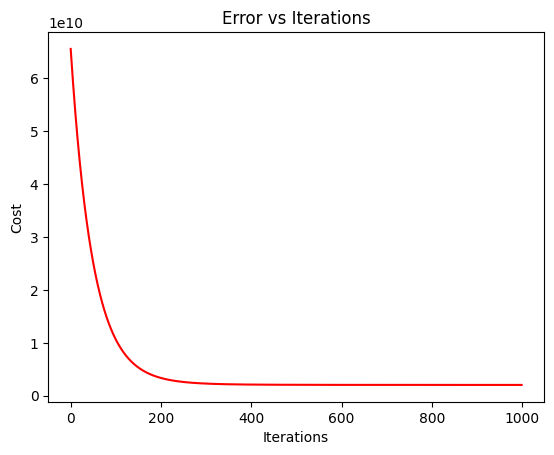

With final theta values of [340397.96353532 109848.00846026  -5866.45408497], cost error is 2043544218.7812896


In [ ]:
# Display cost chart
fig, ax = plt.subplots()
ax.plot(np.arange(iterations), cost_array, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs Iterations')
plt.style.use('fivethirtyeight')
plt.show()

final_cost = 1 / (2 * len(y)) * np.sum((np.dot(X, theta) - y) ** 2)

print('With final theta values of {0}, cost error is {1}'.format(theta, final_cost))
